**Load the dataset**

In [ ]:
import pandas as pd
df=pd.read_excel("/content/Regulatory Affairs of Road Accident Data 2020 India.xlsx")
print(df)

     Million Plus Cities   Cause category        Cause Subcategory  \
0                   Agra  Traffic Control  Flashing Signal/Blinker   
1                   Agra  Traffic Control  Flashing Signal/Blinker   
2                   Agra  Traffic Control  Flashing Signal/Blinker   
3                   Agra  Traffic Control  Flashing Signal/Blinker   
4                   Agra  Traffic Control  Flashing Signal/Blinker   
...                  ...              ...                      ...   
9545               Vizaq          Weather              Sunny/Clear   
9546               Vizaq          Weather              Sunny/Clear   
9547               Vizaq          Weather              Sunny/Clear   
9548               Vizaq          Weather              Sunny/Clear   
9549               Vizaq          Weather              Sunny/Clear   

            Outcome of Incident   Count  
0            Greviously Injured     0.0  
1                  Minor Injury     0.0  
2                Persons Killed  

In [ ]:
df.shape

(9550, 5)

**First few rows of the dataset**

In [ ]:
print(df.head())

  Million Plus Cities   Cause category        Cause Subcategory  \
0                Agra  Traffic Control  Flashing Signal/Blinker   
1                Agra  Traffic Control  Flashing Signal/Blinker   
2                Agra  Traffic Control  Flashing Signal/Blinker   
3                Agra  Traffic Control  Flashing Signal/Blinker   
4                Agra  Traffic Control  Flashing Signal/Blinker   

         Outcome of Incident  Count  
0         Greviously Injured    0.0  
1               Minor Injury    0.0  
2             Persons Killed    0.0  
3              Total Injured    0.0  
4  Total number of Accidents    0.0  


**Last few rows of the datasets**

In [ ]:
print(df.tail())

     Million Plus Cities Cause category Cause Subcategory  \
9545               Vizaq        Weather       Sunny/Clear   
9546               Vizaq        Weather       Sunny/Clear   
9547               Vizaq        Weather       Sunny/Clear   
9548               Vizaq        Weather       Sunny/Clear   
9549               Vizaq        Weather       Sunny/Clear   

            Outcome of Incident   Count  
9545         Greviously Injured   561.0  
9546               Minor Injury   252.0  
9547             Persons Killed   176.0  
9548  Total number of Accidents  1207.0  
9549              Total Injured   813.0  


**Get the column names**

In [ ]:
df.columns

Index(['Million Plus Cities', 'Cause category', 'Cause Subcategory',
       'Outcome of Incident', 'Count'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9547 entries, 0 to 9549
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Million Plus Cities  9547 non-null   object 
 1   Cause category       9547 non-null   object 
 2   Cause Subcategory    9547 non-null   object 
 3   Outcome of Incident  9547 non-null   object 
 4   Count                9547 non-null   float64
dtypes: float64(1), object(4)
memory usage: 447.5+ KB


**Check for missing values**

In [ ]:
print(df.isnull().sum())

Million Plus Cities    0
Cause category         0
Cause Subcategory      0
Outcome of Incident    0
Count                  3
dtype: int64


**Drop the rows of the missing values**

In [ ]:
df.dropna(inplace=True)

**Verify the cleaning process**

In [ ]:
print(df.isnull().sum())

Million Plus Cities    0
Cause category         0
Cause Subcategory      0
Outcome of Incident    0
Count                  0
dtype: int64


In [ ]:
df.shape

(9547, 5)

**Exploratory Data Analysis (EDA)**

Accidents across cities

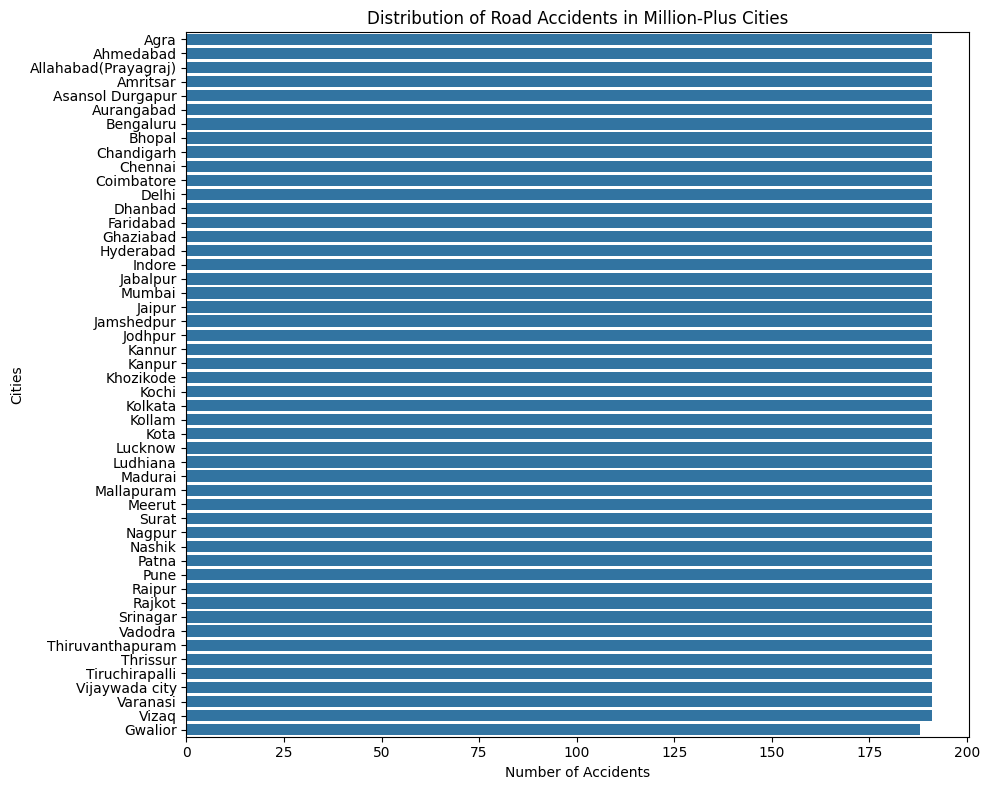

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,8))
sns.countplot(y='Million Plus Cities', data=df,
order=df['Million Plus Cities'].value_counts().index)
plt.title("Distribution of Road Accidents in Million-Plus Cities")
plt.xlabel('Number of Accidents')
plt.ylabel('Cities')
plt.tight_layout()
plt.show()


Analysis of Accident Causes

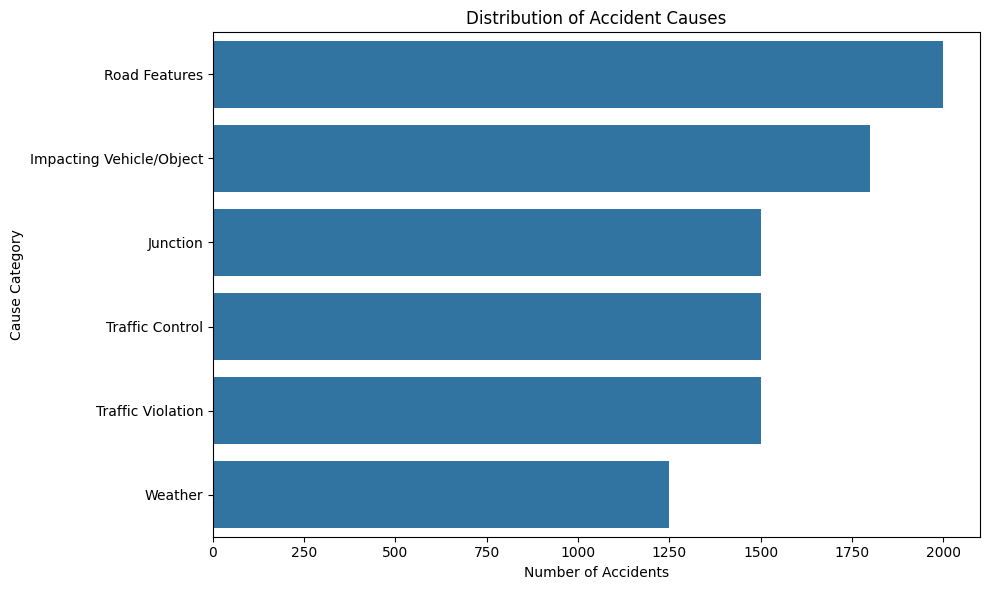

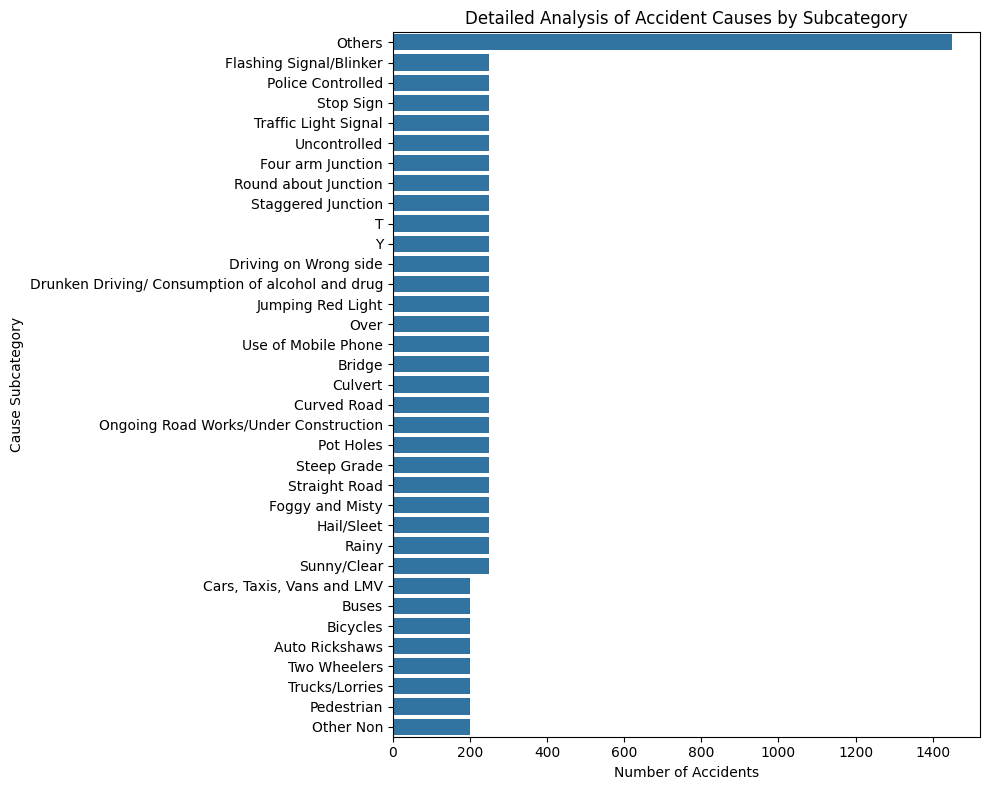

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(y='Cause category', data=df,
order=df['Cause category'].value_counts().index)
plt.title('Distribution of Accident Causes')
plt.xlabel('Number of Accidents')
plt.ylabel('Cause Category')
plt.tight_layout()
plt.show()
# Detailed analysis by cause subcategory
plt.figure(figsize=(10,8))
sns.countplot(y='Cause Subcategory', data=df,order=df['Cause Subcategory'].value_counts().index)
plt.title('Detailed Analysis of Accident Causes by Subcategory')
plt.xlabel('Number of Accidents')
plt.ylabel('Cause Subcategory')
plt.tight_layout()
plt.show()

Outcomes of Incidents

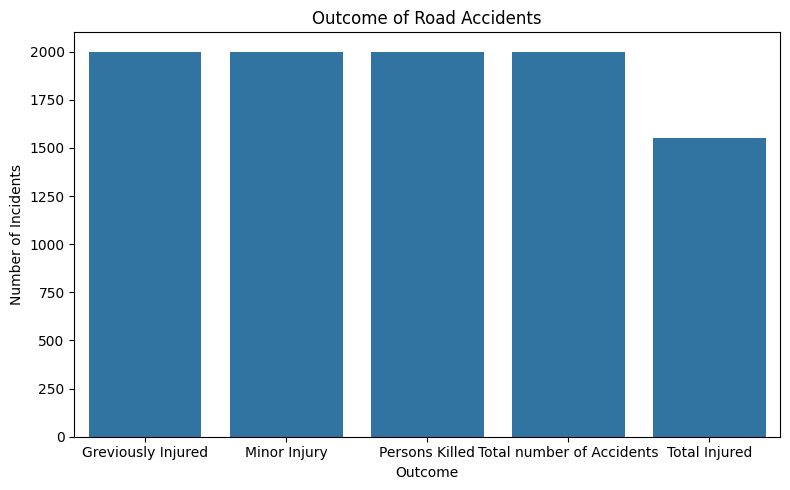

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='Outcome of Incident', data=df,
order=df['Outcome of Incident'].value_counts().index)
plt.title('Outcome of Road Accidents')
plt.xlabel('Outcome')
plt.ylabel('Number of Incidents')
plt.tight_layout()
plt.show()

**Top 10 causes with Cause-category,Cause-Subcategory,Count**




In [ ]:
top_causes = df.groupby(['Cause category', 'Cause Subcategory'])['Count'].sum().reset_index().sort_values(by='Count', ascending=False).head(10)
print(top_causes)

              Cause category Cause Subcategory     Count
39                   Weather       Sunny/Clear  126904.0
33         Traffic Violation              Over  123013.0
22             Road Features     Straight Road  104223.0
10                  Junction            Others   96562.0
24           Traffic Control            Others   96516.0
8   Impacting Vehicle/Object      Two Wheelers   54356.0
28           Traffic Control      Uncontrolled   50001.0
32         Traffic Violation            Others   32594.0
19             Road Features            Others   31606.0
13                  Junction                 T   23555.0


**Identify the top 10 accident causes based on count, categorized by 'Cause Subcategory'**

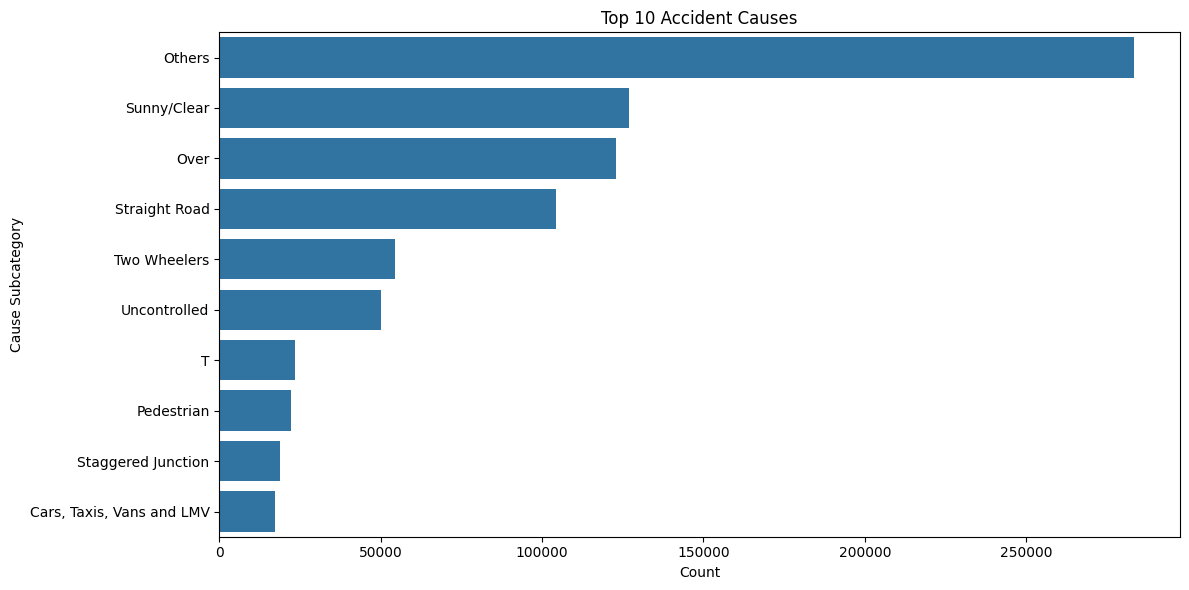

In [ ]:
top_causes = df.groupby('Cause Subcategory')['Count'].sum().reset_index().sort_values(by='Count', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_causes, x="Count", y="Cause Subcategory")
plt.title("Top 10 Accident Causes")
plt.xlabel("Count")
plt.ylabel("Cause Subcategory")
plt.tight_layout()
plt.show()



**Analyzing Accident Causes vs Outcomes**

**Correlation Analysis:**


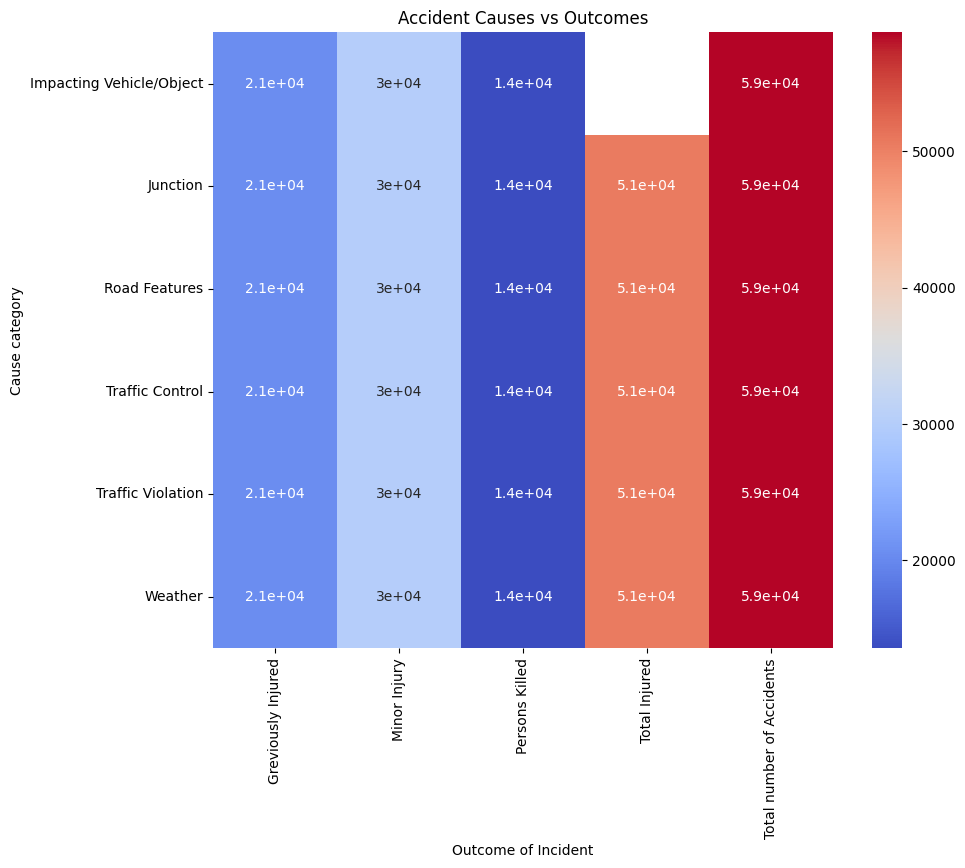

In [ ]:
# Group by cause and outcome, then count
cause_outcome_counts = df.groupby(['Cause category', 'Outcome of Incident'])['Count'].sum().reset_index()

# Pivot table for better visualization
cause_outcome_pivot = cause_outcome_counts.pivot(index='Cause category', columns='Outcome of Incident', values='Count')

# Heatmap visualization
plt.figure(figsize=(10, 8))
sns.heatmap(cause_outcome_pivot, annot=True, cmap='coolwarm')
plt.title("Accident Causes vs Outcomes")
plt.xlabel("Outcome of Incident")
plt.ylabel("Cause category")
plt.show()


**Bar Chart**


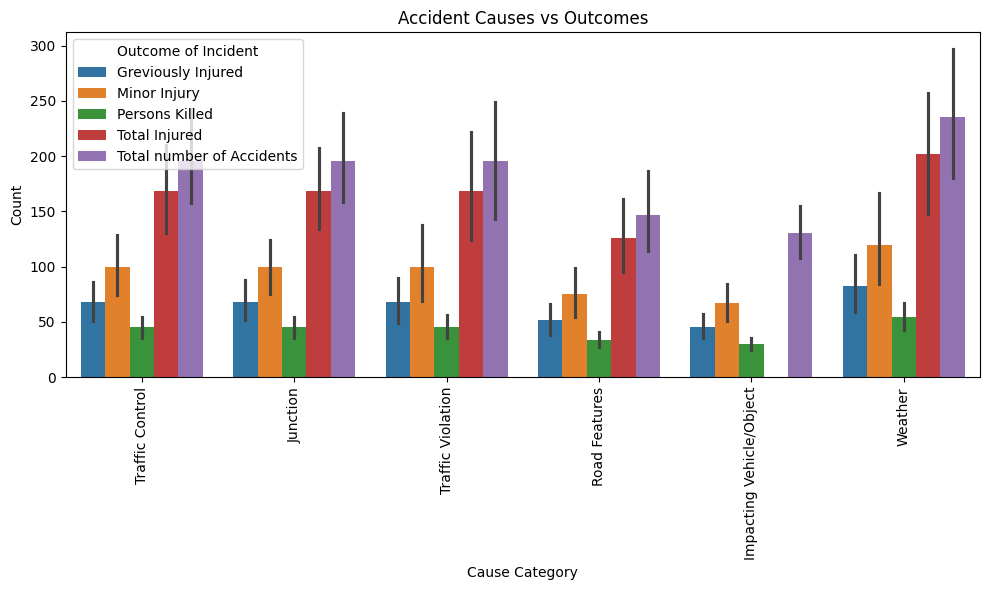

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Cause category', y='Count', hue='Outcome of Incident', data=df, dodge=True)
plt.title("Accident Causes vs Outcomes")
plt.xlabel("Cause Category")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



**Stacked Bar Chart**



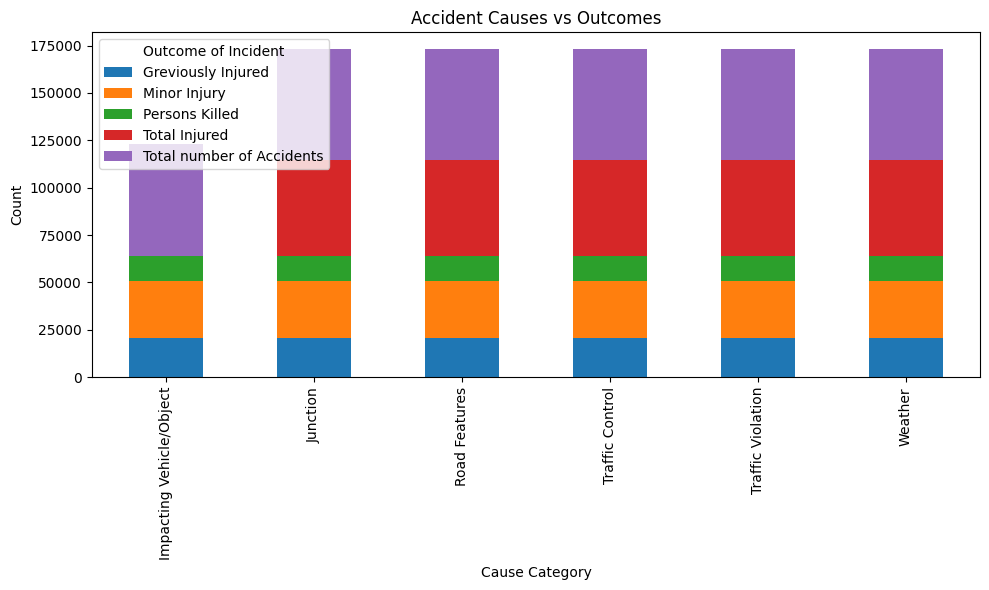

In [ ]:
df.groupby(['Cause category', 'Outcome of Incident'])['Count'].sum().unstack().plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Accident Causes vs Outcomes")
plt.xlabel("Cause Category")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



**Distribution Plots:**


<Axes: xlabel='Outcome of Incident', ylabel='count'>

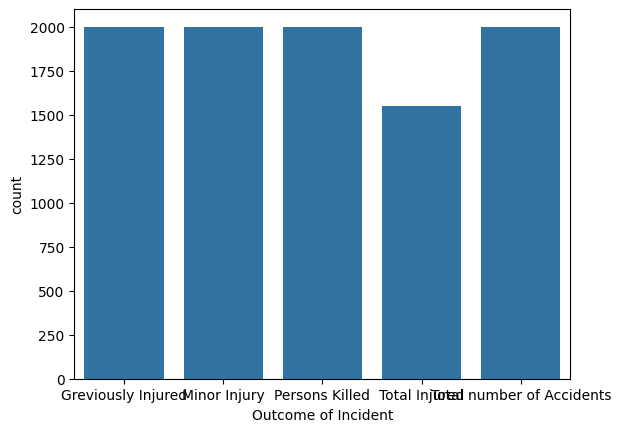

In [ ]:
sns.countplot(x='Outcome of Incident', data=df)

